In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = [{
    "shelf": 3,
    "rack": 1,
    "item": "sketchy banana",
    "inventory":1,
    "price": 1
},{
    "shelf": 2,
    "rack": 4,
    "item": "lone bacon slice",
    "inventory":1,
    "price":2
},{
    "shelf": 5,
    "rack": 3,
    "item": "holiday cheer",
    "inventory":20,
    "price":5.10
},{
    "shelf": 2,
    "rack": 1,
    "item": "empirical pineapple",
    "inventory":11,
    "price":3
},{
    "shelf": 2,
    "rack": 2,
    "item": "lone bacon slice",
    "inventory":1,
    "price":2  
},{
    "shelf": 3,
    "rack": 1,
    "item": "kosher pepper",
    "inventory":2,
    "price": 2.30
},{
    "shelf": 3,
    "rack": 2,
    "item": "kosher pepper",
    "inventory":2,
    "price": "ducky"
}]
df = pd.DataFrame(data)

In [5]:
df["price"] = df["price"].replace({
    "ducky":2.3
})

In [7]:
df

,inventory,item,price,rack,shelf
0,1,sketchy banana,1.0,1,3
1,1,lone bacon slice,2.0,4,2
2,20,holiday cheer,5.1,3,5
3,11,empirical pineapple,3.0,1,2
4,1,lone bacon slice,2.0,2,2
5,2,kosher pepper,2.3,1,3
6,2,kosher pepper,2.3,2,3


In [38]:
shelf_inventory = df[["inventory", "shelf"]].groupby("shelf", as_index=False).sum()
shelf_inventory

,shelf,inventory
0,2,13
1,3,5
2,5,20


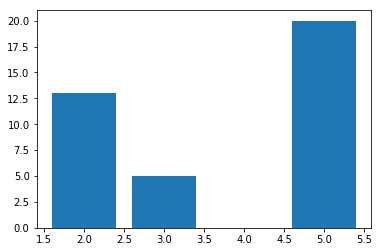

In [46]:
plt.bar(shelf_inventory["shelf"], shelf_inventory["inventory"])
plt.show()

In [63]:
price_inventory = df[["inventory", "price", "item"]].groupby(["item","price"], as_index=False).sum()
price_inventory

,item,price,inventory
0,empirical pineapple,3.0,11
1,holiday cheer,5.1,20
2,kosher pepper,2.3,4
3,lone bacon slice,2.0,2
4,sketchy banana,1.0,1


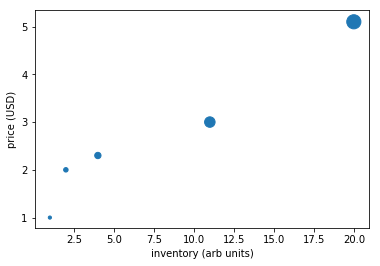

In [69]:
plt.scatter(price_inventory["inventory"], price_inventory["price"], s=price_inventory["inventory"]*10)
plt.xlabel("inventory (arb units)")
plt.ylabel("price (USD)")
plt.show()

In [70]:
price_inventory["percentage"] = price_inventory["inventory"]/price_inventory["inventory"].sum()
price_inventory

,item,price,inventory,percentage
0,empirical pineapple,3.0,11,0.289474
1,holiday cheer,5.1,20,0.526316
2,kosher pepper,2.3,4,0.105263
3,lone bacon slice,2.0,2,0.052632
4,sketchy banana,1.0,1,0.026316


In [71]:
price_inventory["inventory"].sum()

38

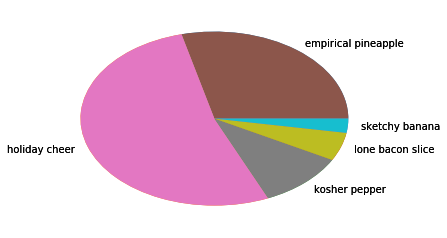

In [73]:
plt.pie(price_inventory["percentage"], labels=price_inventory["item"])
plt.show()